In [1]:
import serpentTools
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

['/Users/alessandroingegno/Desktop/NE170/Fuel/UN/Hexagonal/fission_blanket_hex_res.m']

[0.977818, 0.974735, 0.974521, 0.972289, 0.968184, 0.966923, 0.964852, 0.963585, 0.961692] [0.00074, 0.00074, 0.00075, 0.00074, 0.00074, 0.00074, 0.00076, 0.00075, 0.00073]
[0.489026 0.490165 0.491189 0.491382 0.494867 0.496219 0.496098 0.496972
 0.498202] [0.00148 0.00144 0.00145 0.00145 0.00147 0.00147 0.00144 0.00148 0.00143]


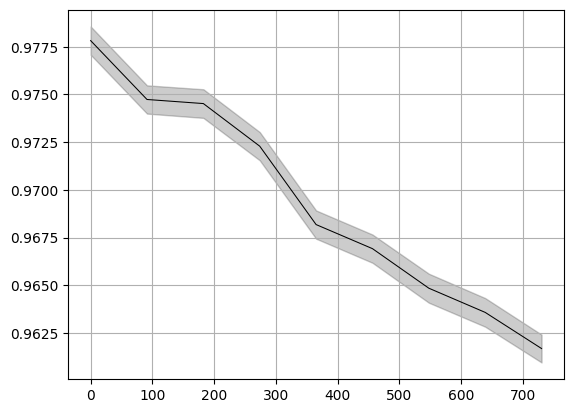

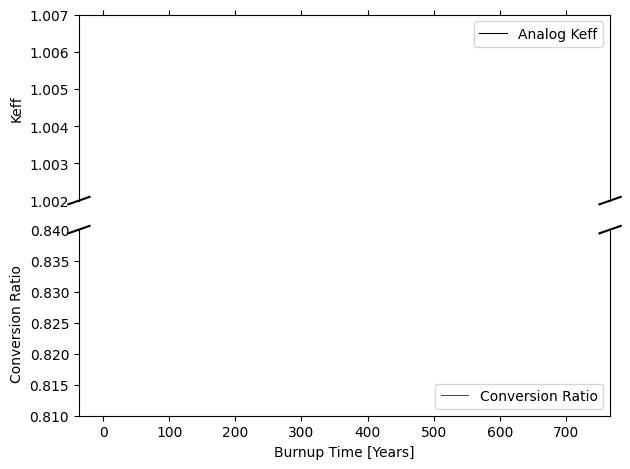

In [6]:
#Graphing of K-eigenvalue

#this is to read _res.m output files from serpent and extract K-eigenvalues
import glob
import matplotlib.pyplot as plt
import numpy as np
import os

#set file path and file type to look for
path = "/Users/alessandroingegno/Desktop/NE170/Fuel/UN/Hexagonal/fission_blanket_hex_res.m"


def file_read(file):

    with open(file,'r') as output:
    
        lines = output.readlines() #reading output file
        search = "% Criticality eigenvalues:" #keyword to search for
        search2 = "% Analog reaction rate estimators:"
        indicies = [] #array of indicies of search word
        indicies2 = []

        #looping through lines and finding index of search word
        for i in range(len(lines)):
            if lines[i].find(search) != -1:
                indicies.append(i)
            elif lines[i].find(search2) != -1:
                indicies2.append(i)
            else:
                continue
    
    #returning file as a list and the index of search word
    return lines, indicies, indicies2

def output_processing(lines, index):
    #extracting different k-eigenvalues per index
    keffs = lines[index+2:index+4]

    values = [] #k-eingenvalues per index
    errors = [] #standard deviation of the eigenvalues

    #adjusting string to return only eigenvalue and standard deviation
    for keff in keffs:
        values.append(float(keff[47:58]))
        errors.append(float(keff[59:66]))
    
    return values, errors

def conversion_ratio(lines,index):
    CR = lines[index+2]

    value = float(CR[47:58])
    error = float(CR[59:66])

    return value, error

def results(path):

    files = glob.glob(path) #getting files from path
    files = sorted(files)
    display(files)
    #figure for plotting
    fig = plt.figure()
    ax = plt.axes()
    plt.grid()
    #plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.plasma(np.linspace(0,1,len(files))))

    
    #Looping through files in outputs
    j = 0
    for file in files:

        #reading lines and getting keff index
        lines, indicies, indicies2 = file_read(file)

        #lists for storing each burnup stage keff
        ana_keff = []
        imp_keff = []

        ana_err = []
        imp_err = []

        cr = []
        cr_err = []

        for i in indicies:
            keffs, sd = output_processing(lines,i)
            ana_keff.append(keffs[0])
            ana_err.append(sd[0])

            imp_keff.append(keffs[-1])
            imp_err.append(sd[-1])
        
        for i in indicies2:
            value, error = conversion_ratio(lines,i)

            cr.append(value)
            cr_err.append(error)

        ana = np.array(ana_keff)
        anaerr = np.array(ana_err)
        imp = np.array(imp_keff)
        imperr = np.array(imp_err)

        cr = np.array(cr)
        cr_err = np.array(cr_err)

        print(ana_keff,ana_err)
        print(cr, cr_err)
        #print(imp_keff,imp_err)

        #burnup_days = [0,1460,2920,4380,5840,7300]
        burnup_days = np.array([0,91.25,182.5,273.75,365,456.25,547.5,638.75,730])
        #print(str(file)[-10:-6])

        #label = str(float(str(file)[-10:-6])/1000) + " P/D"

        #nums = [143.83,148.83,163.83,138.83,128.83,135.83,173.83]
        nums = ['Analog Keff', "Conversion Ratio"]
        ana_max = ana + anaerr
        ana_min = ana - anaerr

        imp_max = imp + imperr
        imp_min = imp - imperr

        cr_max = cr + cr_err
        cr_min = cr - cr_err

        ax.plot(burnup_days,ana_keff,label=nums[j],color='black',linewidth=0.75)
        ax.fill_between(burnup_days,ana_min,ana_max, alpha=0.2,color="black")
        j+=1

        #ax.plot(burnup_days,cr,label=nums[j],color='Red',linewidth=0.75)
        #ax.fill_between(burnup_days,cr_min,cr_max, alpha=0.2,color='Red')
    
        #j+=1
        fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [1, 1]})

# Plot the first line on the upper axis
    ax1.plot(burnup_days, ana, label='Analog Keff',linewidth=0.75,color='black')
    ax1.fill_between(burnup_days,ana_min,ana_max, alpha=0.2,color="black")
    ax1.set_ylim(1.002, 1.007)  # Set desired scale for the upper axis
# Plot the second line on the lower axis
    ax2.plot(burnup_days, cr, label='Conversion Ratio', color='red',linewidth=0.75)
    ax2.fill_between(burnup_days,cr_min,cr_max, alpha=0.2,color='Red')
    ax2.set_ylim(0.81, 0.84)  # Set desired scale for the lower axis

# Indicate the break in the y-axis
    ax1.spines['bottom'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax1.xaxis.tick_top()
    ax2.xaxis.tick_bottom()
    d = 0.02  # How big to make the diagonal lines in axes coordinates
    kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
    ax1.plot((-d, +d), (-d, +d), **kwargs)        # Top diagonal
    ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # Top diagonal
    kwargs.update(transform=ax2.transAxes)
    ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # Bottom diagonal
    ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # Bottom diagonal

# Add labels and legend
    ax1.set_ylabel('Keff')
    ax2.set_ylabel('Conversion Ratio')
    ax2.set_xlabel('Burnup Time [Years]')
    fig.tight_layout()
    ax1.legend()
    ax2.legend(loc='lower right')
    #plt.show()
    #fig.suptitle('Keff Over 20 Year Burnup (124 Assemblies)')
    #ax.set(xlabel="Burn Up Time [Years]",ylabel="Keff",title="Keff Over 20 Year Burnup (124 Assemblies)",ylim=(0.999,1.01))
    #plt.legend(loc="lower right")
    #plt.savefig("keff_CR",dpi=600,bbox_inches='tight')
    
results(path)

In [8]:
import serpentTools
import matplotlib.pyplot as plt
import numpy as np

path = "/Users/alessandroingegno/Desktop/NE170/Fuel/UN/Hexagonal/"
file = "fission_blanket_hex_dep.m"

dets = serpentTools.read(f"{path}{file}")

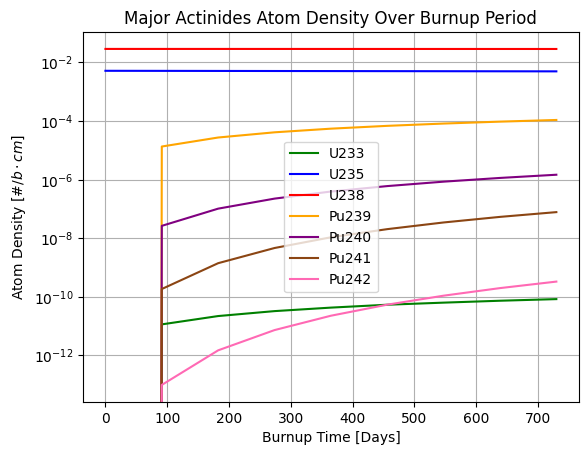

In [10]:
tot = dets.materials['total']

isos=[]

for name in dets.names:
    if tot.getValues('days','adens',names=name)[-1][-1] < 1e-5:
        continue
    else:
        isos.append(name)

names = ['U233',"U235","U238","Pu239","Pu240","Pu241","Pu242"]
adens = tot.getValues('days','adens',names=names)

burnup_days = np.array([0,91.25,182.5,273.75,365,456.25,547.5,638.75,730])
colors = ['green','blue','red','orange','purple','saddlebrown','hotpink']

fig=plt.figure()
ax = plt.axes()

plt.grid()
i = 0

for aden in adens:
    ax.plot(burnup_days,aden,label=names[i],color=colors[i],linewidth=1.5)
    i += 1

ax.set(yscale='log',ylabel=r'Atom Density [$\#/b \cdot cm$]',xlabel='Burnup Time [Days]',title='Major Actinides Atom Density Over Burnup Period')
plt.legend()
#plt.savefig("actinides_ad",dpi=600,bbox_inches='tight',transparent=True)

In [14]:
path = r"/Users/alessandroingegno/Desktop/NE170/Fuel/UN/Hexagonal/"
testFile = 'fission_blanket_hex_det0.m'
print(f'{path}*.m')
print(glob.glob(f'{path}*.m'))
det = serpentTools.read(path+f'{testFile}')

/Users/alessandroingegno/Desktop/NE170/Fuel/UN/Hexagonal/*.m
['/Users/alessandroingegno/Desktop/NE170/Fuel/UN/Hexagonal/fission_blanket_hex_det6.m', '/Users/alessandroingegno/Desktop/NE170/Fuel/UN/Hexagonal/fission_blanket_hex_det8.m', '/Users/alessandroingegno/Desktop/NE170/Fuel/UN/Hexagonal/fission_blanket_hex_det2.m', '/Users/alessandroingegno/Desktop/NE170/Fuel/UN/Hexagonal/fission_blanket_hex_dep.m', '/Users/alessandroingegno/Desktop/NE170/Fuel/UN/Hexagonal/fission_blanket_hex_det5.m', '/Users/alessandroingegno/Desktop/NE170/Fuel/UN/Hexagonal/fission_blanket_hex_res.m', '/Users/alessandroingegno/Desktop/NE170/Fuel/UN/Hexagonal/fission_blanket_hex_det1.m', '/Users/alessandroingegno/Desktop/NE170/Fuel/UN/Hexagonal/fission_blanket_hex_det4.m', '/Users/alessandroingegno/Desktop/NE170/Fuel/UN/Hexagonal/fission_blanket_hex_det0.m', '/Users/alessandroingegno/Desktop/NE170/Fuel/UN/Hexagonal/fission_blanket_hex_det7.m', '/Users/alessandroingegno/Desktop/NE170/Fuel/UN/Hexagonal/fission_blan

<Axes: title={'center': 'FB PD'}, xlabel='X Position [cm]', ylabel='Y Position [cm]'>

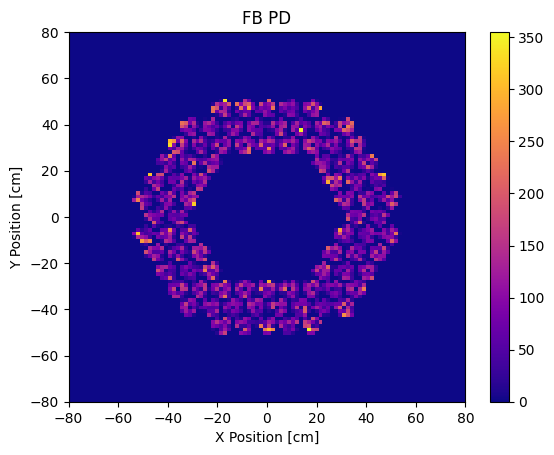

In [18]:
pd = det.detectors['mesh_pd']

pd.meshPlot('xmesh','ymesh',fixed={'zmesh': 50},cbarLabel='Mesh-integrated PD $W/cm^3$',title='FB PD',cmap='plasma')


np.float64(0.00624)

Peaking Factor: 1.1998155840147533


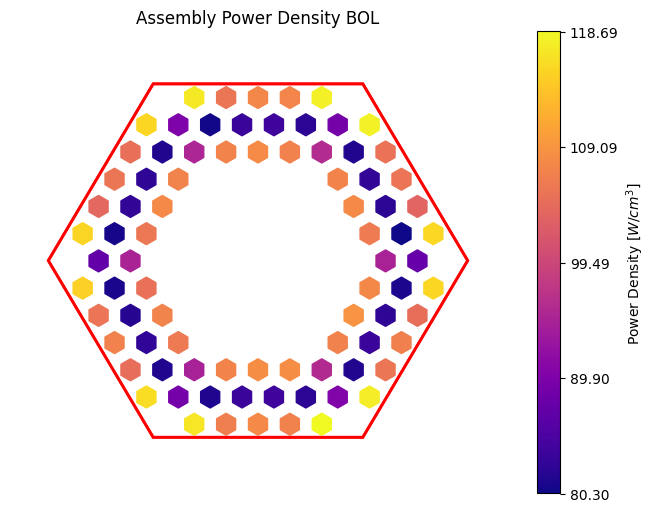

In [20]:
lat = det.detectors['lat_pd']

import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.patches as patches

dx=1
dy=1
Nx = 35 #35,27
Ny = 35 #35,27
X=np.zeros((Nx,Ny))
Y=np.zeros((Nx,Ny))

for i in range(Nx):
    for j in range(Ny):
        X[j,i] = dx*i
        Y[j,i] = dy*j

#x1 = np.linspace()
#x,y = np.meshgrid()
Z = np.array(lat.tallies)/(0.565**2*np.pi*1000*15) #divide by everything in assembly

display(np.max(lat.errors))
Z = Z.reshape(Nx,Ny)

zero_mask = (Z == 0)
non_zero_mask = ~zero_mask

theta = np.pi / 4  # 45 degrees in radians
rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)],
                             [np.sin(theta),  np.cos(theta)]])

# Flatten X and Y for easier manipulation
X_flat = X.flatten()
Y_flat = Y.flatten()

# Apply rotation
rotated_coords = np.dot(rotation_matrix, np.array([X_flat, Y_flat]))
X = rotated_coords[0, :].reshape(Nx, Ny)
Y = rotated_coords[1, :].reshape(Nx, Ny)

fig = plt.figure(figsize=(8,6))
ax = plt.axes()

center = (0,24.05)
radius = 5

#center = (0.5, 0.5)  # Center of the hexagon (x, y)
radius_x = 9.3    # Horizontal radius (width)
radius_y = 5.3     # Vertical radius (height)

# Compute the vertices of the skewed hexagon
angles = np.linspace(0, 2 * np.pi, 7)[:-1]  # Six angles for hexagon (0 to 2π)
vertices = [(center[0] + radius_x * np.cos(angle), center[1] + radius_y * np.sin(angle)) for angle in angles]

# Add the skewed hexagon as a red ring
hexagon = plt.Polygon(vertices, edgecolor='red', fill=False, linewidth=2)

#hexagon = patches.RegularPolygon(
#    center,         # Center of the hexagon
#    numVertices=6,  # Number of vertices (6 for hexagon)
#    radius=radius,  # Radius
#    orientation=(np.pi/2),  # Rotation angle (in radians)
#    edgecolor='red',  # Color of the edge
#    fill=False,     # Do not fill the hexagon
#    linewidth=2     # Line width of the edges
#)


# Add the hexagon to the axis
ax.add_patch(hexagon)

#display(X[non_zero_mask],Y[non_zero_mask],Z[non_zero_mask])
#surf = ax.plot_surface(X,Y,Z,cmap = 'plasma',antialiased=False)
#im = plt.imshow(T_cl,cmap='plasma',interpolation='none')
#cbar = plt.colorbar(im,label='Temperature')
#cbar.set_ticks(np.linspace(np.min(T_cl),np.max(T_cl),5))
sc = ax.scatter(X[non_zero_mask], Y[non_zero_mask], 
                c=Z[non_zero_mask], cmap='plasma', 
               s=250, norm=Normalize(vmin=np.min(Z[non_zero_mask]), vmax=np.max(Z)),marker='h')
ax.scatter(X[zero_mask],Y[zero_mask], Z[zero_mask], 
          c='gray') #700 size for assembly

cbar = plt.colorbar(sc, label=r'Power Density $[W/cm^3]$')
cbar.set_ticks(np.linspace(np.min(Z[non_zero_mask]), np.max(Z), 5))
#plt.xlabel('X-axis')
#plt.ylabel('Y-axis')
plt.title('Assembly Power Density BOL')
#for assembly
#ax.set(xlim=(-9,10),ylim=(16,28)) 
ax.add_patch(hexagon)
ax.set(xlim=(-11,11),ylim=(18,30))
ax.axis('off')
plt.savefig('demo_power_density',dpi=600,transparent=True)

peak = np.max(Z)
avg = np.average(Z[non_zero_mask])

pf = peak/avg

print(f"Peaking Factor: {pf}")
